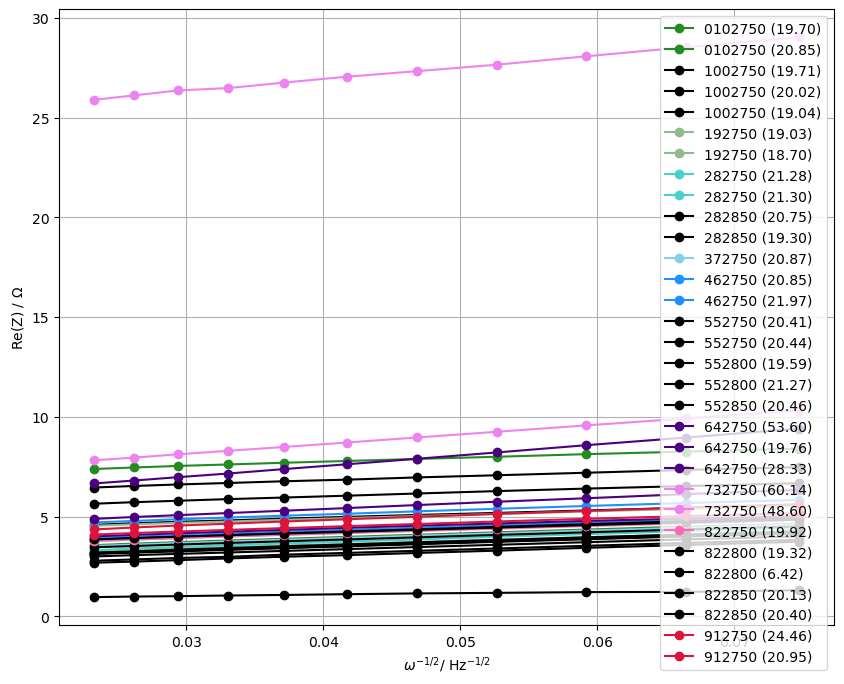

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Define the directory where your text files are located
directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/EIS'  # Replace with the actual directory path

# Get a list of all text files in the directory
file_list = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

# Initialize a figure for the combined plot
plt.figure(figsize=(10, 8))

# Extract the six-number code from each filename using regular expressions
def extract_six_number_code(filename):
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

# Sort the file list numerically based on the six-number code
sorted_file_list = sorted(file_list, key=extract_six_number_code) 

# Define colors based on six or seven consecutive numbers extracted from filenames
color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '642750': 'indigo',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson'
}

slopes = []

# Loop through each file and plot the data
for filename in sorted_file_list:
    six_number_code = extract_six_number_code(filename)
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, delimiter='\t')

    # Extract data from freqrecip and ReZ columns
    freqrecip = df['freq/Hz'][27:38]
    ReZ = df['Re(Z)/Ohm'][27:38]

    # Calculate reciprocal of the square root of frequency
    recip_sqrt_freq = 1 / np.sqrt(freqrecip)

    # Plot the data for this file with the six-number code as the label and the assigned color
    plt.plot(recip_sqrt_freq, ReZ, marker='o', linestyle='-', label=six_number_code, color=color_mapping.get(six_number_code, 'black'))

    # Calculate the gradient (slope) of the best-fit line
    if len(recip_sqrt_freq) > 1:
        slope, _ = np.polyfit(recip_sqrt_freq, ReZ, 1)
        slopes.append(slope)  # Append the slope to the list

# Customize the plot
plt.xlabel('$\omega^{-1/2}$/ Hz$^{-1/2}$')
plt.ylabel('Re(Z) / $\Omega$')
plt.grid(True)

# Create legend labels with extracted six or seven consecutive numbers from filenames and gradients
legend_labels = [f"{extract_six_number_code(label)} ({slope:.2f})" for label, slope in zip(sorted_file_list, slopes)]
plt.legend(legend_labels)  # Display the legend

plt.show()
